In [1]:
import torch
import pytorch_lightning as pl
from models_vit import DataModule, ViTLightning
from pathlib import Path

pl.seed_everything(0)

Global seed set to 0


0

In [2]:
# input
model_checkpoint = 'google/vit-base-patch16-224-in21k'
path = Path.home() / 'Desktop/dog_cat'

# setup data
dm = DataModule(data_dir=path, model_name=model_checkpoint)
train_ds, val_ds, test_ds = dm.setup()

Resolving data files:   0%|          | 0/25000 [00:00<?, ?it/s]

Using custom data configuration default-27a599091314e833
Found cached dataset imagefolder (C:/Users/Kevin/.cache/huggingface/datasets/imagefolder/default-27a599091314e833/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
Loading cached split indices for dataset at C:/Users/Kevin/.cache/huggingface/datasets/imagefolder/default-27a599091314e833/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f\cache-aa336e2dcafe124c.arrow and C:/Users/Kevin/.cache/huggingface/datasets/imagefolder/default-27a599091314e833/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f\cache-66d19859bfbef318.arrow
Loading cached split indices for dataset at C:/Users/Kevin/.cache/huggingface/datasets/imagefolder/default-27a599091314e833/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f\cache-4c6679d53bf67667.arrow and C:/Users/Kevin/.cache/huggingface/datasets/imagefolder/default-27a599091314e833/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5a

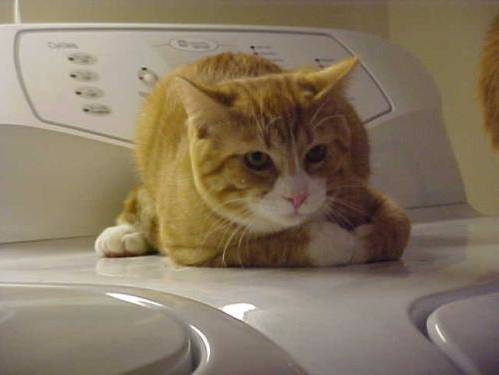

In [5]:
train_ds[10]['image']

In [23]:
model = ViTLightning(model_checkpoint, train_ds, val_ds, test_ds, batch_size=32)
model.load_state_dict(torch.load('model/vit_finetune.pt'))
model.eval()

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTLightning(
  (vit): ViTForImageClassification(
    (vit): ViTModel(
      (embeddings): ViTEmbeddings(
        (patch_embeddings): ViTPatchEmbeddings(
          (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (encoder): ViTEncoder(
        (layer): ModuleList(
          (0): ViTLayer(
            (attention): ViTAttention(
              (attention): ViTSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
              (output): ViTSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
            (intermediate

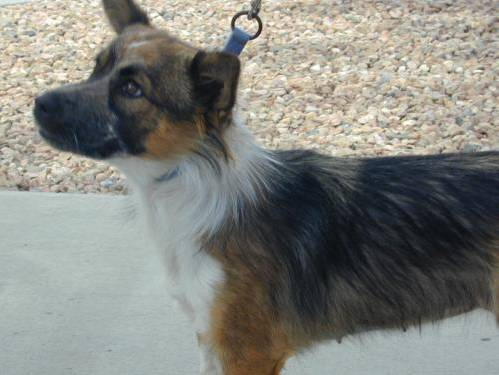

In [24]:
test_ds[10]['image']

In [8]:
classes = ('cat', 'dog')
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

In [15]:
with torch.no_grad():
    for data in test_ds:
        images, labels, pixel_val = data
        images, labels = images.to('cuda:0'), labels.to('cuda:0')
        model = model.cuda()
        outputs = torch.round(torch.sigmoid(model(images)))
        predictions = outputs.squeeze().int()
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
            break


# print accuracy for each class
# for classname, correct_count in correct_pred.items():
#     accuracy = 100 * float(correct_count) / total_pred[classname]
#     print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

AttributeError: 'str' object has no attribute 'to'

In [25]:
with torch.no_grad():
    y_hat = model(test_ds[1]['pixel_values'])

ValueError: not enough values to unpack (expected 4, got 3)

In [21]:
test_ds[1]['pixel_values']

tensor([[[-0.7412, -0.7569, -0.7569,  ..., -0.7569, -0.8275, -0.7882],
         [-0.6706, -0.7020, -0.7412,  ..., -0.6000, -0.7020, -0.7490],
         [-0.6627, -0.6314, -0.6549,  ..., -0.6314, -0.5765, -0.5686],
         ...,
         [-0.7569, -0.8588, -0.8275,  ...,  0.3490,  0.3490,  0.3882],
         [-0.6627, -0.7255, -0.7176,  ...,  0.3569,  0.3412,  0.3725],
         [-0.5843, -0.6157, -0.6314,  ...,  0.3725,  0.3569,  0.3882]],

        [[-0.7569, -0.7725, -0.7725,  ..., -0.7725, -0.8275, -0.7882],
         [-0.6863, -0.7176, -0.7569,  ..., -0.6157, -0.7098, -0.7490],
         [-0.6784, -0.6471, -0.6706,  ..., -0.6471, -0.5843, -0.5686],
         ...,
         [-0.7725, -0.8745, -0.8431,  ...,  0.1451,  0.1216,  0.1451],
         [-0.6784, -0.7412, -0.7333,  ...,  0.1529,  0.1137,  0.1294],
         [-0.6000, -0.6314, -0.6471,  ...,  0.1686,  0.1294,  0.1451]],

        [[-0.7490, -0.7647, -0.7647,  ..., -0.7490, -0.8118, -0.7725],
         [-0.6784, -0.7098, -0.7490,  ..., -0

In [ ]:
# if torch.cuda.is_available():
#     trainer = pl.Trainer(gpus=1, max_epochs=10, logger=wandb_logger)
# else:
#     trainer = pl.Trainer(max_epochs=10, logger=wandb_logger)
#
# # train, validate
# trainer.fit(model, dm)
# trainer.test()
# wandb.finish()